# Model Building


## Load Libraries

In [1]:
# Load Libraries 
from catboost import CatBoostRegressor
import pandas as pd 
from ipynb.fs.full.functions import box, graphit
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, mean_squared_error, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn import metrics, preprocessing
import statsmodels.api as sma
from xgboost import XGBRegressor
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.decomposition import PCA
from ipynb.fs.full.functions import acc_score, plot_actuals
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet
import lightgbm

In [2]:
# Flags for Models
####################################
min_goal   = 1
pca_flag   = True
log_flag   = True
title      = f'Min Goals {min_goal}, PCA: {pca_flag}'
####################################

In [3]:
# Load data 
df_22  = pd.read_csv('22_final.csv')

In [4]:
# Drop Column
df_22 = df_22.drop(['Unnamed: 0'], axis = 1)

In [5]:
# Generate Target Variable
print('Length Before:', len(df_22))
df_22 = df_22[df_22['np_goals'] > min_goal]
print('Len After:', len(df_22))

Length Before: 2786
Len After: 829


In [6]:
# Take log of data
if log_flag:
    print('Scaling Using: LOG')
    num = df_22.select_dtypes(exclude=['object']).columns
    df_22[num] = df_22[num].applymap(lambda x: np.log(x+1))
else:
    print('No Scaling')

Scaling Using: LOG


In [7]:
# Dummy Code data
df_22 = pd.get_dummies(df_22)

In [8]:
df_22['np_goals'].max()

3.1780538303479458

# PCA

In [9]:
# Scale Data 
#df_std = StandardScaler().fit_transform(df_22)
#df1 = pd.DataFrame(df_std)
# Rename 
#columnsx = list(df_22.columns)
#df1.columns = df1.columns[:0].tolist()+ columnsx

Performing PCA


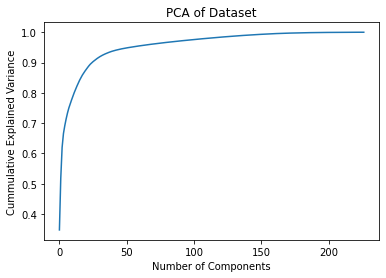

In [10]:
# Perform PCA 
if pca_flag:
    print('Performing PCA')
    pca = PCA().fit(df_22)
    pca_data = pca.transform(df_22)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.title('PCA of Dataset')
    plt.xlabel('Number of Components')
    plt.ylabel('Cummulative Explained Variance')
    plt.show()
else: 
    print('NO PCA')

# Train/Test Split

In [11]:
# Under sample 
#df_22 = df_22.sample(n = 500, random_state = 1)

In [12]:
# Train Test Split 
from sklearn.model_selection import train_test_split
X = df_22.drop('np_goals',axis=1) # Independet variable
y = df_22['np_goals'] # dependent variable

# Split the data into training, test, and validation sets
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, y, test_size=0.2, random_state = 23)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.25, random_state = 22)

In [13]:
# Final PCA 
# Applying PCA function on training
# and testing set of X component
if pca_flag:
    print('Performing PCA')
    pca = PCA(n_components = .95) 
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    X_val = pca.transform(X_val)
    X_val_and_test = pca.transform(X_val_and_test)
    explained_variance = pca.explained_variance_ratio_
else: 
    print('NO PCA')

Performing PCA


# Linear Regression

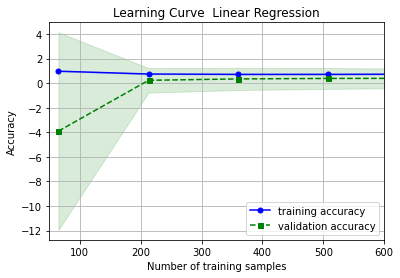

In [14]:
# Create the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X_train, y=y_train, cv=100, n_jobs=-1)

# Calculate the mean and standard deviation of the training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of the test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.xlim(50, 600)
plt.legend(loc='lower right')
plt.title('Learning Curve  Linear Regression')
plt.show()

In [15]:
# Train the linear regression model
regressor = LinearRegression()
# Predict the test set labels and evaluate the performance of the model
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#Performance 
acc_lr, mse_lr, rmse_lr, r2_lr = acc_score(y_test, y_pred)

MAE 0.193
MSE 0.063
RMSE 0.251
R square  0.675


In [16]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

# Initialize the model
model = LinearRegression()

# Initialize the k-fold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate the mean squared error for each fold
scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
rmse_scores = -scores

# Calculate the mean and standard deviation of the MSE
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'Mean RMSE: {mean_rmse:.3f}')
print(f'Standard deviation RMSE: {std_rmse:.3f}')

Mean RMSE: 0.279
Standard deviation RMSE: 0.015


<Figure size 640x640 with 0 Axes>

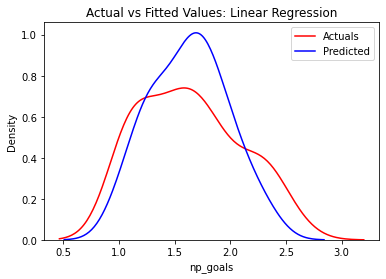

In [17]:
# Plot Actuals VS Predicted
plot_actuals(y_test, y_pred, model_name = 'Linear Regression')

# Elastic Net Regression

In [18]:
# Fit the model
model = ElasticNet(alpha=.001, l1_ratio=1) 
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
acc_lr, mse_lr, rmse_lr, r2_lr = acc_score(y_test, y_pred)

MAE 0.198
MSE 0.062
RMSE 0.249
R square  0.68


<Figure size 640x640 with 0 Axes>

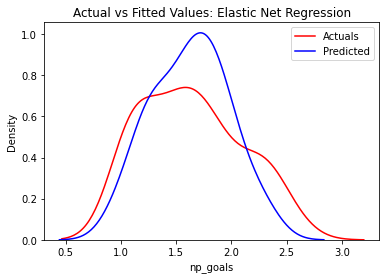

In [19]:
# Plot Actuals VS Predicted
plot_actuals(y_test, y_pred, model_name = 'Elastic Net Regression')

# XGBOOST

In [20]:
# XGBoost Parameter Tuning
regressor=XGBRegressor(eval_metric='rmse')

# set up our search grid
param_grid = {"max_depth":    [1],
              "n_estimators": [100],
              "learning_rate": [.5],
              "colsample_bytree": [.5],
              "gamma": [.0001],
              "reg_lambda": [8,9]
              }

# try out every combination of the above values
search = GridSearchCV(estimator = regressor, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)
search.fit(X_train, y_train)
# Print Best Params
print("Best parameters:", search.best_params_)

# OPTIMAL PARAMETERS
xgb = XGBRegressor(**search.best_params_)
xgb.fit(X_train, y_train)

# Predictions
y_pred = xgb.predict(X_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best parameters: {'colsample_bytree': 0.5, 'gamma': 0.0001, 'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 100, 'reg_lambda': 9}


In [21]:
# Accuracy Measures
acc_xgb, mse_xgb, rmse_xgb, r2_xgb = acc_score(y_test, y_pred)

MAE 0.229
MSE 0.077
RMSE 0.277
R square  0.604


<Figure size 640x640 with 0 Axes>

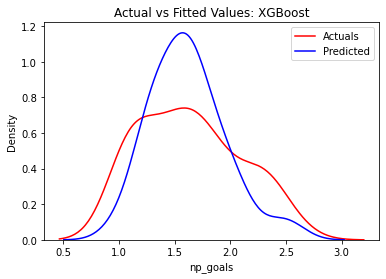

In [22]:
# Plot Actuals VS Predicted
plot_actuals(y_test, y_pred, model_name = 'XGBoost')

# Random Forest

In [23]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [90,95],
    'max_features': [12],
    'min_samples_leaf': [1],
    'min_samples_split': [8],
    'n_estimators': [100]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

# Print Best Params
print("Best parameters:", grid_search.best_params_)

# OPTIMAL PARAMETERS 
rf = RandomForestRegressor(**grid_search.best_params_)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best parameters: {'bootstrap': False, 'max_depth': 90, 'max_features': 12, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 100}


In [24]:
# Accuracy Measures
acc_rf, mse_rf, rmse_rf, r2_rf = acc_score(y_test, y_pred)

MAE 0.281
MSE 0.109
RMSE 0.33
R square  0.438


<Figure size 640x640 with 0 Axes>

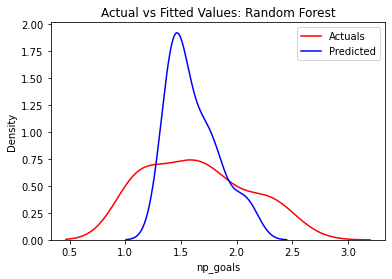

In [25]:
# Plot Actuals VS Predicted
plot_actuals(y_test, y_pred, model_name = 'Random Forest')

# Decision Tree 

In [26]:
# Grid Search to find best parameters
dtree = DecisionTreeRegressor()

# Set Params
param_grid = {"criterion": [ 'poisson'],
              "min_samples_split": [6],
              "max_depth": [4],
              "min_samples_leaf": [10]
              }
dtree_grid = GridSearchCV(dtree, param_grid, cv=10, verbose = 1, n_jobs = -1)
# Fit modelS
dtree_grid.fit(X_train, y_train)

# Print Best Params
print("Best parameters:", dtree_grid.best_params_)

# OPTIMAL PARAMETERS
dtree = DecisionTreeRegressor(**dtree_grid.best_params_)
dtree.fit(X_train, y_train)

# Predictions 
y_preds = dtree.predict(X_test) 

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters: {'criterion': 'poisson', 'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 6}


In [27]:
#Performance 
acc_dt, mse_dt, rmse_dt, r2_dt = acc_score(y_test, y_preds)

MAE 0.276
MSE 0.115
RMSE 0.339
R square  0.407


<Figure size 640x640 with 0 Axes>

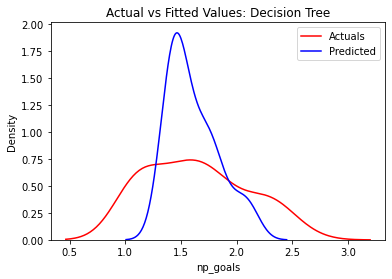

In [28]:
# Plot Actuals VS Predicted
plot_actuals(y_test, y_pred, model_name = 'Decision Tree')

# LightGBM 

In [29]:
# other scikit-learn modules
estimator = LGBMRegressor()

# Set Params
param_grid = {'learning_rate': [0.01, 0.1, 1, 10],
              "max_depth": [2, 4, 6, 8],
              "n_estimators": [200],
              "num_leaves": [30, 50, 70],
              "min_child_samples": [5, 10, 20]
              }

# define a custom MSE scoring function
def mse_custom(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

# create a scorer using the custom MSE scoring function
mse_scorer = make_scorer(mse_custom)

# create the GridSearchCV object, using MSE as the scoring metric
search = GridSearchCV(estimator = estimator, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)
search.fit(X_train, y_train)

# Print Best Params
print("Best parameters:", search.best_params_)

# OPTIMAL PARAMETERS 
lgb = LGBMRegressor(**search.best_params_, early_stopping = 5)
lgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='mse')

# Predict on TEST
y_pred = lgb.predict(X_test)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 30}
[1]	valid_0's l2: 0.225231
[2]	valid_0's l2: 0.210303
[3]	valid_0's l2: 0.198328
[4]	valid_0's l2: 0.188794
[5]	valid_0's l2: 0.179606
[6]	valid_0's l2: 0.173467
[7]	valid_0's l2: 0.165533
[8]	valid_0's l2: 0.156778
[9]	valid_0's l2: 0.152156
[10]	valid_0's l2: 0.148623
[11]	valid_0's l2: 0.146243
[12]	valid_0's l2: 0.14273
[13]	valid_0's l2: 0.140258
[14]	valid_0's l2: 0.137022
[15]	valid_0's l2: 0.134759
[16]	valid_0's l2: 0.132493
[17]	valid_0's l2: 0.131691
[18]	valid_0's l2: 0.12983
[19]	valid_0's l2: 0.128836
[20]	valid_0's l2: 0.127861
[21]	valid_0's l2: 0.126243
[22]	valid_0's l2: 0.124914
[23]	valid_0's l2: 0.124422
[24]	valid_0's l2: 0.122525
[25]	valid_0's l2: 0.122321
[26]	valid_0's l2: 0.120831
[27]	valid_0's l2: 0.120315
[28]	valid_0's l2: 0.119507
[29]	valid_0's l2: 0.118499
[30]	valid_0's

In [30]:
#Performance 
acc_lgbm, mse_lgbm, rmse_lgbm, r2_lgbm = acc_score(y_test, y_pred)

MAE 0.247
MSE 0.088
RMSE 0.297
R square  0.545


<Figure size 640x640 with 0 Axes>

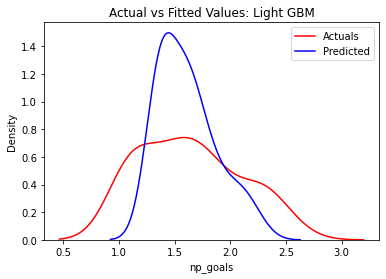

In [31]:
# Plot Actuals VS Predicted
plot_actuals(y_test, y_pred, model_name = 'Light GBM')

# Catboost

In [32]:
# Initialize CatBoostRegressor
# Optimal Parameters 
parameters = {'depth'         : [2],
              'learning_rate' : [.5],
              'iterations'    : [60],
              'l2_leaf_reg'   : [6],
              'border_count'  : [20],
              'bootstrap_type': ['Bayesian'],
             } 

# Grid Search 
model = CatBoostRegressor()
model.set_params(early_stopping_rounds = 10)
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1, 
                    scoring='neg_mean_squared_error', verbose=1, refit=True, error_score=0)
grid.fit(X_train, y_train)

# Print Best Params
print("Best parameters:", grid.best_params_)

# Optimal Parameters
catb = CatBoostRegressor(**grid.best_params_)
catb.fit(X_train, y_train)

# Predictions
y_pred = grid.predict(X_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
0:	learn: 0.4617615	total: 167ms	remaining: 9.83s
1:	learn: 0.4075613	total: 168ms	remaining: 4.88s
2:	learn: 0.3864954	total: 170ms	remaining: 3.23s
3:	learn: 0.3764347	total: 171ms	remaining: 2.4s
4:	learn: 0.3559236	total: 173ms	remaining: 1.9s
5:	learn: 0.3509362	total: 174ms	remaining: 1.57s
6:	learn: 0.3482211	total: 176ms	remaining: 1.33s
7:	learn: 0.3377761	total: 178ms	remaining: 1.16s
8:	learn: 0.3297361	total: 179ms	remaining: 1.02s
9:	learn: 0.3222203	total: 181ms	remaining: 905ms
10:	learn: 0.3175505	total: 183ms	remaining: 813ms
11:	learn: 0.3120647	total: 184ms	remaining: 737ms
12:	learn: 0.3076597	total: 186ms	remaining: 671ms
13:	learn: 0.3025433	total: 187ms	remaining: 615ms
14:	learn: 0.2986612	total: 189ms	remaining: 567ms
15:	learn: 0.2948594	total: 190ms	remaining: 523ms
16:	learn: 0.2916986	total: 191ms	remaining: 484ms
17:	learn: 0.2892329	total: 192ms	remaining: 449ms
18:	learn: 0.2860642	total: 193ms	r

In [33]:
# Model Performance
acc_cb ,mse_cb, rmse_cb, r2_cb = acc_score(y_test, y_pred)

MAE 0.243
MSE 0.09
RMSE 0.3
R square  0.535


<Figure size 640x640 with 0 Axes>

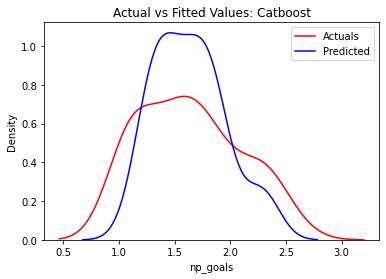

In [34]:
# Plot Acutals VS Pred
plot_actuals(y_test, y_pred, model_name = 'Catboost')

***************

# Nueral Network

In [35]:
# Neural Network
np.random.seed(123)
#tf.random.set_seed(123)

# Create the model
model = Sequential()
# Add the first layer to the model
model.add(Dense(units=50, activation='relu', input_dim=53))
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='relu'))
# Add the output layer with a linear activation function
model.add(Dense(units=1, activation=None))#, kernel_regularizer=regularizers.l2(0.01)))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Create the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# Fit the model on the training data with the EarlyStopping callback
nn = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, batch_size=32, callbacks=[early_stopping])
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)

# Print the test loss
print(f"Test loss: {test_loss:.4f}")

Epoch 1/1000
21/21 [==============================] - 1s 9ms/step - loss: 2.0652 - val_loss: 0.9452
Epoch 2/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.5434 - val_loss: 0.4117
Epoch 3/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.2207 - val_loss: 0.2317
Epoch 4/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.1495 - val_loss: 0.1912
Epoch 5/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.1247 - val_loss: 0.1671
Epoch 6/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.1061 - val_loss: 0.1602
Epoch 7/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.0941 - val_loss: 0.1519
Epoch 8/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.0835 - val_loss: 0.1426
Epoch 9/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.0757 - val_loss: 0.1386
Epoch 10/1000
21/21 [==============================] - 0s 3ms/step - loss: 0.0692 - val_loss: 0.1384

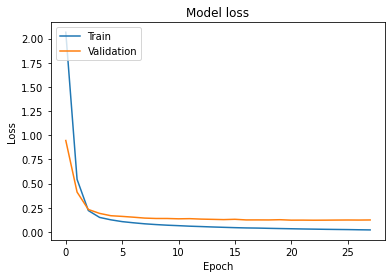

In [36]:
# Plot the training and validation loss
plt.plot(nn.history['loss'])
plt.plot(nn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [37]:
# Use the model to make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.squeeze(y_pred)

# Print the performance metrics
acc_nn, mse_nn, rmse_nn , r2_nn = acc_score(y_test, y_pred)

2/2 [==============================] - 0s 2ms/step
MAE 0.241
MSE 0.085
RMSE 0.292
R square  0.56


<Figure size 640x640 with 0 Axes>

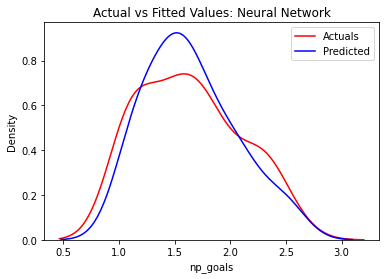

In [38]:
# Plot variation
plot_actuals(y_test, y_pred, model_name = 'Neural Network')

****

# Final Accuracy

In [39]:
# Aggregate Scores
df = pd.DataFrame({
    'Model':['Linear Regression','XGBoost','Random Forest','Decision Tree','LightGBM','CatBoost', 'Nerual Network'],
    'MAE':[acc_lr, acc_xgb, acc_rf, acc_dt, acc_lgbm, acc_cb, acc_nn],
    'MSE':[mse_lr, mse_xgb, mse_rf ,mse_dt, mse_lgbm, mse_cb, mse_nn],
    'RMSE':[rmse_lr, rmse_xgb, rmse_rf, rmse_dt, rmse_lgbm, rmse_cb, rmse_nn],
    'R2':[r2_lr, r2_xgb, r2_rf, r2_dt, r2_lgbm, r2_cb, r2_nn]
})
# Sort Values
df = df.sort_values(by = 'MAE', ascending = True)

<function matplotlib.pyplot.show(close=None, block=None)>

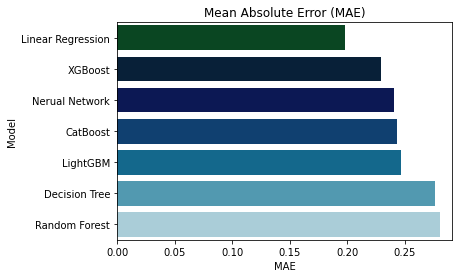

In [40]:
# Plot Scores
df = df.sort_values(by = 'MAE', ascending = True)
sns.barplot(x = 'MAE', y = 'Model',palette = 'ocean',data = df, orient = 'h')
plt.title(f'Mean Absolute Error (MAE)')
plt.xlim(0, (df['MAE'].max()+ .01))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

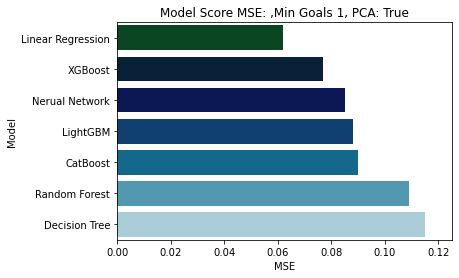

In [41]:
# Plot Scores
df = df.sort_values(by = 'MSE')
sns.barplot(x = 'MSE', y = 'Model',palette = 'ocean',data = df, orient = 'h')
plt.title(f'Model Score MSE: ,{title}')
plt.xlim(0, (df['MSE'].max()+ .01))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

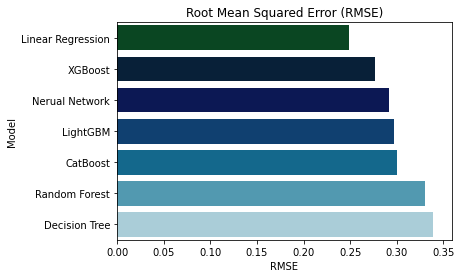

In [42]:
# Plot Scores
df = df.sort_values(by = 'RMSE')
sns.barplot(x = 'RMSE', y = 'Model',palette = 'ocean',data = df, orient = 'h')
plt.title(f'Root Mean Squared Error (RMSE)')
plt.xlim(0, (df['RMSE'].max()+ .02))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

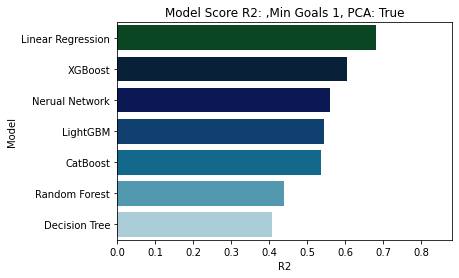

In [43]:
# Plot Scores
df = df.sort_values(by = 'R2', ascending = False)
sns.barplot(x = 'R2', y = 'Model',palette = 'ocean',data = df, orient = 'h')
sns.color_palette("mako", as_cmap=True)
plt.title(f'Model Score R2: ,{title}')
plt.xlim(0, df['R2'].max() +.2)
plt.show

In [46]:
# Show df
df = df.sort_values(by='MAE', ascending = True)
print(df)

               Model    MAE    MSE   RMSE     R2
0  Linear Regression  0.198  0.062  0.249  0.680
1            XGBoost  0.229  0.077  0.277  0.604
6     Nerual Network  0.241  0.085  0.292  0.560
5           CatBoost  0.243  0.090  0.300  0.535
4           LightGBM  0.247  0.088  0.297  0.545
3      Decision Tree  0.276  0.115  0.339  0.407
2      Random Forest  0.281  0.109  0.330  0.438


# DONE 

In [45]:
# Sound When Code is Finished
import winsound
 # frequency is set to 500Hz
freq = 500
# duration is set to 100 milliseconds            
dur = 1
dur = dur * 1000         
# Make Noise
winsound.Beep(freq, dur)